In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

import modules_py.functions as f
import modules_py.functions_vec as fv

plt.style.use('publication23.mplstyle')

In [2]:
from matplotlib.colors import ListedColormap

cmap_green = ListedColormap(['#ffffff00', '#a1ae25']) # Green
cmap_red = ListedColormap(['#ffffff00', '#ec4f43']) # Red
cmap_blue = ListedColormap(['#ffffff00', '#0960BD']) # Blue
cmap_yellow = ListedColormap(['#ffffff00', '#F6C90E']) # Yellow

In [3]:
def get_data_from_file(filename):
    '''Data getter.'''
    data = np.genfromtxt(filename)
    if data.ndim == 1:
        return np.array([data[0]]), np.array([data[1:]])
    else:
        return data[:, 0], data[:, 1:]

# Sorting key
import re
def atoi(text):
    '''Turns text to numbers.'''
    return int(text) if text.isdigit() else text
def natural_keys(text):
    '''Keys for intuitive string sorting.'''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

In [4]:
def free_branch(k):
    return np.sqrt(k ** 2 + 1)
free_branch_vec = np.vectorize(free_branch)

# $\Pi_{\pi N \Delta}$

## $n = 1.0 n_0$

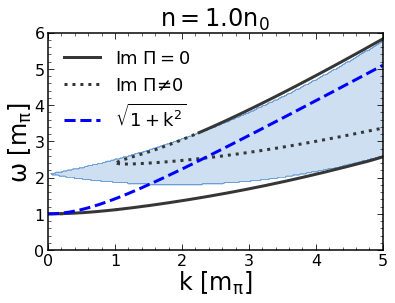

In [6]:
pf = 1.91
n_pf = 2 * pf ** 3 / (3 * np.pi ** 2 * 0.47)
pf_name = '%.3f/' % pf
graphs_dir = 'graph_data/'
function_name = 'eq_pnd/' # <--
directory_name = graphs_dir + function_name + pf_name

graph_files = os.listdir(directory_name)
graph_files.sort(key=natural_keys)

%matplotlib inline

label_solid_done = False
label_dotted_done = False
for graph_file in graph_files:
    K, W = get_data_from_file(directory_name + graph_file)
    
    for w in W.T:
        solid_line_condition = np.abs(fv.d_pnd(K, w, pf, width=0).imag) == 0 # <--
        not_solid_line_condition = np.invert(solid_line_condition)
        
        if label_solid_done:
            plt.plot(K[solid_line_condition], w[solid_line_condition], color='#363636')
        else:
            plt.plot(K[solid_line_condition], w[solid_line_condition], color='#363636', label=r'Im $\Pi = 0$')
            label_solid_done = True
        
        if label_dotted_done:
            plt.plot(K[not_solid_line_condition], w[not_solid_line_condition], color='#363636', ls=':')
        else:
            plt.plot(K[not_solid_line_condition], w[not_solid_line_condition], color='#363636', ls=':', label=r'Im $\Pi \ne 0$')
            label_dotted_done = True
            
k_slice = 4
k = np.r_[1e-9:5:200j]
w = np.r_[1e-9:6:200j]
        
K, W = np.meshgrid(k, w)

plt.contourf(K, W, np.abs(fv.d_pnd(K, W, pf, width=0).imag) > 0, cmap=cmap_blue, alpha=0.2) # <--

# Free branch
plt.plot(k, free_branch_vec(k), color='blue', ls='--', label=r'$\sqrt{1 + k ^ 2}$')

# Equation slice
# plt.axvline(x=k_slice, ls='-.', color='red')

plt.xlim(0, 5)
plt.ylim(0, 6)

plt.title(r'$n = %.1f n_0$' % n_pf)
plt.xlabel(r'$k$ $[m_\pi]$')
plt.ylabel(r'$\omega$ $[m_\pi]$')
plt.legend(loc='upper left', frameon=False)
plt.savefig('figures/eq/eq_pnd_%3.2f.pdf' % n_pf, dpi=300, format='PDF', bbox_inches='tight') # <--
plt.show()

## $n = 2.2 n_0$

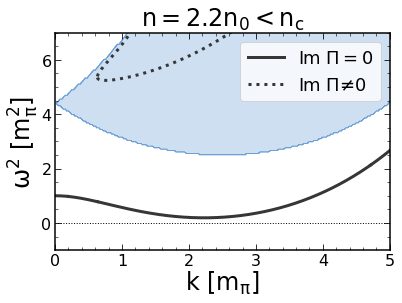

In [7]:
pf = 2.5
n_pf = 2 * pf ** 3 / (3 * np.pi ** 2 * 0.47)
pf_name = '%.3f/' % pf
graphs_dir = 'graph_data/'
function_name = 'eq_pnd/' # <--
directory_name = graphs_dir + function_name + pf_name

graph_files = os.listdir(directory_name)
graph_files.sort(key=natural_keys)

%matplotlib inline

label_solid_done = False
label_dotted_done = False
for graph_file in graph_files:
    K, W = get_data_from_file(directory_name + graph_file)
    
    for w in W.T:
        solid_line_condition = np.abs(fv.d_pnd(K, w, pf, width=0).imag) == 0 # <--
        not_solid_line_condition = np.invert(solid_line_condition)
        
        if label_solid_done:
            plt.plot(K[solid_line_condition], w[solid_line_condition] ** 2, color='#363636')
        else:
            plt.plot(K[solid_line_condition], w[solid_line_condition] ** 2, color='#363636', label=r'Im $\Pi = 0$')
            label_solid_done = True

        if label_dotted_done:
            plt.plot(K[not_solid_line_condition], w[not_solid_line_condition] ** 2, color='#363636', ls=':')
        else:
            plt.plot(K[not_solid_line_condition], w[not_solid_line_condition] ** 2, color='#363636', ls=':', label=r'Im $\Pi \ne 0$')
            label_dotted_done = True

# k_slice = 4
k = np.r_[1e-9:5:200j]
w = np.r_[1e-9:np.sqrt(10):200j]

K, W = np.meshgrid(k, w)

plt.contourf(K, W ** 2, np.abs(fv.d_pnd(K, W, pf, width=0).imag) > 0, cmap=cmap_blue, alpha=0.2) # <--

# Free branch
# plt.plot(k ** 2, free_branch_vec(k) ** 2, color='blue', ls='--', label=r'$\sqrt{1 + k ^ 2}$')

# Equation slice
# plt.axvline(x=k_slice, ls='-.', color='red')
plt.axhline(y=0, ls=':', lw=1, color='black')

plt.xlim(0, 5)
plt.ylim(-1, 7)

plt.title(r'$n = %.1f n_0 < n_c$' % n_pf)
plt.xlabel(r'$k$ $[m_\pi]$')
plt.ylabel(r'$\omega ^ 2$ $[m_\pi ^ 2]$')
plt.legend(loc='upper right')

plt.savefig('figures/eq/eq_pnd_%3.2f.pdf' % n_pf, dpi=300, format='PDF', bbox_inches='tight') # <--
plt.show()

## $n = 4.3 n_0$

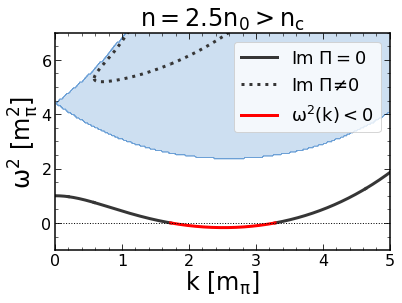

In [8]:
pf = 2.6
n_pf = 2 * pf ** 3 / (3 * np.pi ** 2 * 0.47)
pf_name = '%.3f/' % pf
graphs_dir = 'graph_data/'
function_name = 'eq_pnd/' # <--
directory_name = graphs_dir + function_name + pf_name

function_name_i = 'eq_pnd_i/' # <--
directory_name_i = graphs_dir + function_name_i + pf_name

graph_files = os.listdir(directory_name)
graph_files.sort(key=natural_keys)

graph_files_i = os.listdir(directory_name_i)
graph_files_i.sort(key=natural_keys)

%matplotlib inline

label_solid_done = False
label_dotted_done = False
for graph_file in graph_files:
    K, W = get_data_from_file(directory_name + graph_file)
    
    for w in W.T:
        solid_line_condition = np.abs(fv.d_pnd(K, w, pf, width=0).imag) == 0 # <--
        not_solid_line_condition = np.invert(solid_line_condition)
        
        if label_solid_done:
            plt.plot(K[solid_line_condition], w[solid_line_condition] ** 2, color='#363636')
        else:
            plt.plot(K[solid_line_condition], w[solid_line_condition] ** 2, color='#363636', label=r'Im $\Pi = 0$')
            label_solid_done = True
        
        if label_dotted_done:
            plt.plot(K[not_solid_line_condition], w[not_solid_line_condition] ** 2, color='#363636', ls=':')
        else:
            plt.plot(K[not_solid_line_condition], w[not_solid_line_condition] ** 2, color='#363636', ls=':', label=r'Im $\Pi \ne 0$')
            label_dotted_done = True

label_done = False
for graph_file_i in graph_files_i:
    K, W = get_data_from_file(directory_name_i + graph_file_i)

    for w in W.T:
        if label_done:
            plt.plot(K, -w ** 2, color='red')
        else:
            plt.plot(K, -w ** 2, color='red', label=r'$\omega ^ 2 (k) < 0$')
            label_done = True

k_slice = 4
k = np.r_[1e-9:5:200j]
w = np.r_[1e-9:np.sqrt(10):200j]

K, W = np.meshgrid(k, w)

plt.contourf(K, W ** 2, np.abs(fv.d_pnd(K, W, pf, width=0).imag) > 0, cmap=cmap_blue, alpha=0.2) # <--

# Free branch
# plt.plot(k, free_branch_vec(k), color='blue', ls='--', label=r'$\sqrt{1 + k ^ 2}$')

# Equation slice
# plt.axvline(x=k_slice, ls='-.', color='red')
plt.axhline(y=0, ls=':', lw=1, color='black')

plt.xlim(0, 5)
plt.ylim(-1, 7)

plt.title(r'$n = %.1f n_0 > n_c$' % n_pf)
plt.xlabel(r'$k$ $[m_\pi]$')
plt.ylabel(r'$\omega ^ 2$ $[m_\pi ^ 2]$')
plt.legend(loc='upper right')
plt.savefig('figures/eq/eq_pnd_%3.2f.pdf' % n_pf, dpi=300, format='PDF', bbox_inches='tight') # <--
plt.show()